In [1]:
import pandas as pd    
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import LabelEncoder, StandardScaler  
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV 
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import wilcoxon
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chisquare


# Random Forrest  
# Decision Tree

from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("./dataset_elvanakbas.csv")
df2 = pd.read_csv("./comparedataset_elvanakbas.csv")

In [3]:
df1.head()

,Reporter Name,Partner Name,Year,Trade Flow,Product Group,Export (US$ Thousand),Import (US$ Thousand),Export Product Share (%),Import Product Share (%),Revealed comparative advantage,...,MFN Total Tariff Lines,MFN Dutiable Tariff Lines Share (%),MFN Duty Free Tariff Lines Share (%),MFN Specific Tariff Lines Share (%),MFN AVE Tariff Lines Share (%),MFN MaxRate (%),MFN MinRate (%),MFN SpecificDuty Imports (US$ Thousand),MFN Dutiable Imports (US$ Thousand),MFN Duty Free Imports (US$ Thousand)
0,Ireland,Albania,2017,EXPIMP,Food Products,59.73,0.09,0.68,0.00,0.89,...,4.0,0.00,100.00,0.00,0.00,0.00,0.0,0.00,0.00,0.09
1,Ireland,United Arab Emirates,2017,EXPIMP,Food Products,57904.95,121.14,12.83,0.43,7.29,...,242.0,55.79,4.13,16.53,23.55,76.78,0.0,3.55,106.29,14.85
2,Ireland,Argentina,2017,EXPIMP,Food Products,8914.84,199728.78,9.26,79.19,2.57,...,366.0,17.49,2.19,12.02,68.31,61.72,0.0,53432.26,56365.14,143363.64
3,Ireland,Armenia,2017,EXPIMP,Food Products,253.85,0.01,11.63,0.04,1.08,...,2.0,50.00,50.00,0.00,0.00,57.60,0.0,0.00,0.00,0.00
4,Ireland,Antigua and Barbuda,2017,EXPIMP,Food Products,0.27,0.16,0.11,5.57,3.54,...,6.0,0.00,33.33,66.67,0.00,0.00,0.0,0.16,0.16,0.00


In [4]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,170.0,2017.000000,0.000000,2017.00,2017.0000,2017.00,2017.0000,2017.00
Export (US$ Thousand),170.0,119052.428294,631105.958393,0.00,253.3700,3327.24,18488.7225,6876157.35
Import (US$ Thousand),170.0,94053.575941,559082.055619,0.00,1.8850,344.46,8414.1825,5435974.21
Export Product Share (%),157.0,16.221529,22.473935,0.00,2.9100,7.07,16.5800,96.65
Import Product Share (%),170.0,12.543176,22.235984,0.00,0.4675,3.38,10.6800,99.99
Revealed comparative advantage,139.0,2.585036,2.624143,0.01,0.7650,1.59,3.4650,13.78
World Growth (%),137.0,5.143869,10.789919,-14.44,1.6300,3.98,6.5300,84.45
Country Growth (%),137.0,9.148759,43.951899,-86.24,-9.9400,2.49,13.4300,241.37
AHS Simple Average (%),141.0,4.763262,6.620329,0.00,0.0000,0.36,8.5300,28.98
AHS Weighted Average (%),141.0,4.418582,9.009826,0.00,0.0000,0.03,5.4000,51.49


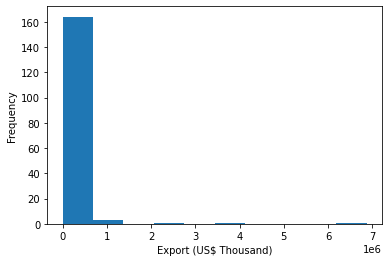

In [5]:
plt.hist(df1['Export (US$ Thousand)'])
plt.xlabel('Export (US$ Thousand)')
plt.ylabel('Frequency')
plt.show()

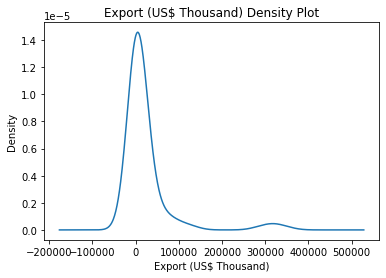

In [6]:

range_min = 0
range_max = 500000

export_data = df1[(df1['Export (US$ Thousand)'] >= range_min) & (df1['Export (US$ Thousand)'] <= range_max)]

export_data['Export (US$ Thousand)'].plot(kind='density')

plt.title('Export (US$ Thousand) Density Plot')
plt.xlabel('Export (US$ Thousand)')
plt.ylabel('Density')

plt.show()

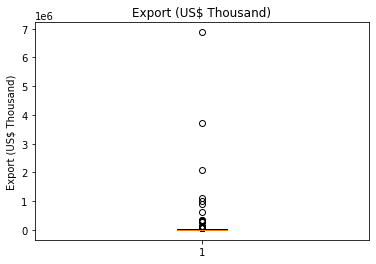

In [7]:

export_values = df1['Export (US$ Thousand)']

fig, ax = plt.subplots()
ax.boxplot(export_values)


ax.set_title('Export (US$ Thousand)')
ax.set_ylabel('Export (US$ Thousand)')

plt.show()

In [8]:
df2.head()

,Reporter Name,Partner Name,Year,Trade Flow,Product Group,Export (US$ Thousand),Import (US$ Thousand),Export Product Share (%),Import Product Share (%),Revealed comparative advantage,...,MFN Total Tariff Lines,MFN Dutiable Tariff Lines Share (%),MFN Duty Free Tariff Lines Share (%),MFN Specific Tariff Lines Share (%),MFN AVE Tariff Lines Share (%),MFN MaxRate (%),MFN MinRate (%),MFN SpecificDuty Imports (US$ Thousand),MFN Dutiable Imports (US$ Thousand),MFN Duty Free Imports (US$ Thousand)
0,Europe & Central Asia,Aruba,2017.0,EXPIMP,Food Products,43527.46,30.04,18.89,0.04,NaN,...,371.0,11.32,15.09,25.07,48.52,53.98,0.0,11.93,23.83,14.42
1,Europe & Central Asia,Afghanistan,2017.0,EXPIMP,Food Products,83063.99,664.48,3.93,0.97,NaN,...,364.0,25.82,4.40,20.05,49.73,202.81,0.0,150.03,320.77,0.10
2,Europe & Central Asia,Angola,2017.0,EXPIMP,Food Products,408399.96,1578.53,8.46,0.06,NaN,...,328.0,25.30,7.62,10.06,57.01,59.59,0.0,16.91,1571.40,7.08
3,Europe & Central Asia,Anguila,2017.0,EXPIMP,Food Products,690.93,408.40,2.88,10.49,NaN,...,183.0,4.37,25.14,21.86,48.63,39.83,0.0,300.33,406.27,2.14
4,Europe & Central Asia,Albania,2017.0,EXPIMP,Food Products,337297.75,73181.15,8.36,3.53,NaN,...,3011.0,28.63,7.61,12.82,50.95,3000.00,0.0,7610.22,69405.48,3982.18


In [9]:
df1.corr()

,Year,Export (US$ Thousand),Import (US$ Thousand),Export Product Share (%),Import Product Share (%),Revealed comparative advantage,World Growth (%),Country Growth (%),AHS Simple Average (%),AHS Weighted Average (%),...,MFN Total Tariff Lines,MFN Dutiable Tariff Lines Share (%),MFN Duty Free Tariff Lines Share (%),MFN Specific Tariff Lines Share (%),MFN AVE Tariff Lines Share (%),MFN MaxRate (%),MFN MinRate (%),MFN SpecificDuty Imports (US$ Thousand),MFN Dutiable Imports (US$ Thousand),MFN Duty Free Imports (US$ Thousand)
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Export (US$ Thousand),NaN,1.000000,0.964234,-0.074981,-0.050779,-0.024945,-0.021006,-0.028530,0.140617,0.117304,...,0.579250,0.096529,-0.084263,-0.130304,-0.076980,0.315277,-0.047179,0.811141,0.848239,0.764052
Import (US$ Thousand),NaN,0.964234,1.000000,-0.078015,-0.017968,-0.042427,-0.023998,-0.022416,0.082784,0.065069,...,0.480723,0.079406,-0.071997,-0.115324,-0.079073,0.265402,-0.038899,0.733819,0.760767,0.694057
Export Product Share (%),NaN,-0.074981,-0.078015,1.000000,0.050194,0.305888,0.052503,-0.008996,-0.252071,-0.170080,...,-0.257733,-0.157770,0.402235,-0.169432,-0.218680,-0.325557,0.118416,-0.117155,-0.111444,-0.105982
Import Product Share (%),NaN,-0.050779,-0.017968,0.050194,1.000000,-0.037097,-0.015130,0.108249,0.110568,0.057518,...,-0.059004,0.081489,-0.198688,0.121512,0.096404,-0.035824,0.169174,0.053510,0.012213,0.054045
Revealed comparative advantage,NaN,-0.024945,-0.042427,0.305888,-0.037097,1.000000,-0.019452,0.028497,-0.109612,-0.094776,...,-0.097518,-0.176305,0.102080,0.029986,0.028730,-0.204356,0.013112,-0.073066,-0.069235,-0.057067
World Growth (%),NaN,-0.021006,-0.023998,0.052503,-0.015130,-0.019452,1.000000,0.093773,-0.078559,-0.015663,...,0.021834,0.066141,0.011488,-0.059291,-0.033349,0.035357,-0.032022,-0.013661,-0.012655,-0.008073
Country Growth (%),NaN,-0.028530,-0.022416,-0.008996,0.108249,0.028497,0.093773,1.000000,-0.125028,-0.098082,...,-0.037521,-0.023365,0.014886,0.049455,-0.031994,-0.142403,0.284237,0.003831,-0.013132,0.019863
AHS Simple Average (%),NaN,0.140617,0.082784,-0.252071,0.110568,-0.109612,-0.078559,-0.125028,1.000000,0.748765,...,0.440430,0.299028,-0.360968,-0.106151,0.227652,0.589467,0.104490,0.180222,0.209543,0.185893
AHS Weighted Average (%),NaN,0.117304,0.065069,-0.170080,0.057518,-0.094776,-0.015663,-0.098082,0.748765,1.000000,...,0.324040,0.255829,-0.217430,-0.073231,0.062785,0.393620,0.078708,0.153064,0.206803,0.126911


In [10]:
df1 = df1[["Export (US$ Thousand)","AHS Simple Average (%)","AHS Weighted Average (%)","MFN Total Tariff Lines","MFN Specific Tariff Lines Share (%)","MFN MaxRate (%)","MFN SpecificDuty Imports (US$ Thousand)","Year"]]

In [11]:
df1.head()

,Export (US$ Thousand),AHS Simple Average (%),AHS Weighted Average (%),MFN Total Tariff Lines,MFN Specific Tariff Lines Share (%),MFN MaxRate (%),MFN SpecificDuty Imports (US$ Thousand),Year
0,59.73,0.00,0.00,4.0,0.00,0.00,0.00,2017
1,57904.95,14.21,14.32,242.0,16.53,76.78,3.55,2017
2,8914.84,10.35,0.57,366.0,12.02,61.72,53432.26,2017
3,253.85,0.00,0.00,2.0,0.00,57.60,0.00,2017
4,0.27,0.00,0.00,6.0,66.67,0.00,0.16,2017


In [12]:
df1.corr()

,Export (US$ Thousand),AHS Simple Average (%),AHS Weighted Average (%),MFN Total Tariff Lines,MFN Specific Tariff Lines Share (%),MFN MaxRate (%),MFN SpecificDuty Imports (US$ Thousand),Year
Export (US$ Thousand),1.000000,0.140617,0.117304,0.579250,-0.130304,0.315277,0.811141,NaN
AHS Simple Average (%),0.140617,1.000000,0.748765,0.440430,-0.106151,0.589467,0.180222,NaN
AHS Weighted Average (%),0.117304,0.748765,1.000000,0.324040,-0.073231,0.393620,0.153064,NaN
MFN Total Tariff Lines,0.579250,0.440430,0.324040,1.000000,-0.252490,0.754439,0.627488,NaN
MFN Specific Tariff Lines Share (%),-0.130304,-0.106151,-0.073231,-0.252490,1.000000,-0.222272,-0.143739,NaN
MFN MaxRate (%),0.315277,0.589467,0.393620,0.754439,-0.222272,1.000000,0.362864,NaN
MFN SpecificDuty Imports (US$ Thousand),0.811141,0.180222,0.153064,0.627488,-0.143739,0.362864,1.000000,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df2.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,225.0,2.017000e+03,0.000000e+00,2017.00,2017.000,2017.00,2017.000,2.017000e+03
Export (US$ Thousand),225.0,3.874540e+06,2.458675e+07,0.00,14122.000,150527.37,803881.190,2.942889e+08
Import (US$ Thousand),225.0,3.553911e+06,2.307411e+07,0.02,714.440,52329.90,615008.600,2.676342e+08
Export Product Share (%),221.0,7.280769e+00,6.201654e+00,0.11,3.440,5.60,9.590,5.561000e+01
Import Product Share (%),225.0,8.947689e+00,1.569307e+01,0.00,0.430,2.95,7.990,9.087000e+01
Revealed comparative advantage,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
World Growth (%),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Growth (%),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AHS Simple Average (%),223.0,8.205964e+00,8.766341e+00,0.00,1.145,5.60,14.075,5.693000e+01
AHS Weighted Average (%),223.0,7.185605e+00,1.329414e+01,0.00,0.045,1.51,10.360,1.077000e+02


In [14]:
df2.info()  # Veri kümesinin genel bilgilerini görüntüleyin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Reporter Name                            236 non-null    object 
 1   Partner Name                             225 non-null    object 
 2   Year                                     225 non-null    float64
 3   Trade Flow                               225 non-null    object 
 4   Product Group                            225 non-null    object 
 5   Export (US$ Thousand)                    225 non-null    float64
 6   Import (US$ Thousand)                    225 non-null    float64
 7   Export Product Share (%)                 221 non-null    float64
 8   Import Product Share (%)                 225 non-null    float64
 9   Revealed comparative advantage           0 non-null      float64
 10  World Growth (%)                         0 non-nul

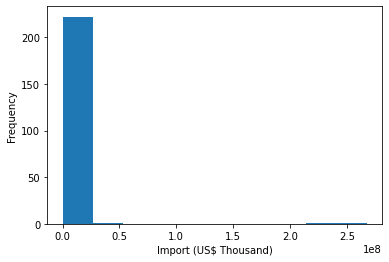

In [15]:
plt.hist(df2['Import (US$ Thousand)'])
plt.xlabel('Import (US$ Thousand)')
plt.ylabel('Frequency')
plt.show()


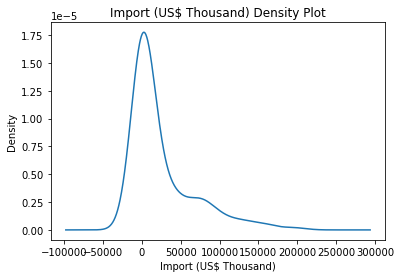

In [16]:
range_min = 0
range_max = 200000

import_data = df2[(df2['Import (US$ Thousand)'] >= range_min) & (df2['Import (US$ Thousand)'] <= range_max)]

import_data['Import (US$ Thousand)'].plot(kind='density')

plt.title('Import (US$ Thousand) Density Plot')
plt.xlabel('Import (US$ Thousand)')
plt.ylabel('Density')

plt.show()


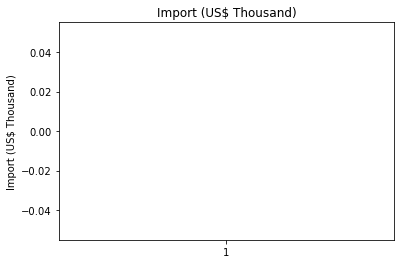

In [17]:
import_values = df2['Import (US$ Thousand)']

fig, ax = plt.subplots()
ax.boxplot(import_values)

ax.set_title('Import (US$ Thousand)')
ax.set_ylabel('Import (US$ Thousand)')

plt.show()


# Statistical Analysis

In [18]:
# Wilcoxon test 
data1 = df1["Export (US$ Thousand)"].sample(n=100)
data2 = df2["Export (US$ Thousand)"].sample(n=100)

stat, p = wilcoxon(data1, data2)
print("Statistics=%.3f, p=%.3f" % (stat, p))
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is significant difference between median values (H0 can be rejected)")

Statistics=612.000, p=0.000
There is significant difference between median values (H0 can be rejected)


In [19]:
#One-sample hypothesis tests

stat, p = ttest_1samp(data1, 119052)

# Test sonucunu yazdıralım
print("Statistics=%.3f, p=%.3f" % (stat, p))

# p değerini değerlendirelim
alpha = 0.05
if p > alpha:
    print("The mean of the dataset is equal to 0.8 (H0 cannot be rejected)")
else:
    print("The mean of the dataset does not equal 0.8 (H0 is rejected)")
    
    
    
#For df2
stat, p = ttest_1samp(data2, 119052)

# Test sonucunu yazdıralım
print("Statistics=%.3f, p=%.3f" % (stat, p))

# p değerini değerlendirelim
alpha = 0.05
if p > alpha:
    print("The mean of the dataset is equal to 0.8 (H0 cannot be rejected)")
else:
    print("The mean of the dataset does not equal 0.8 (H0 is rejected)")

Statistics=-0.985, p=0.327
The mean of the dataset is equal to 0.8 (H0 cannot be rejected)
Statistics=nan, p=nan
The mean of the dataset does not equal 0.8 (H0 is rejected)


In [20]:
# T-test 

stat, p = ttest_ind(data1, data2)
print("Statistics=%.3f, p=%.3f" % (stat, p))

# p değerini değerlendirelim
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=nan, p=nan
There is a significant difference between the median values ​​(H0 is rejected)


In [21]:
# Analysis of Variance

# Anova testini uygulayalım
stat, p = f_oneway(data1, data2)

# Test sonucunu yazdıralım
print("Statistics=%.3f, p=%.3f" % (stat, p))

# p değerini değerlendirelim
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=nan, p=nan
There is a significant difference between the median values ​​(H0 is rejected)


In [22]:
# Chi-Squared test

stat, p = chisquare(data1, data2)

# Test sonucunu yazdıralım
print("Statistics=%.3f, p=%.3f" % (stat, p))

# p değerini değerlendirelim
alpha = 0.05
if p > alpha:
    print("Frequency distributions are equal (H0 cannot be rejected)")
else:
    print("Frequency distributions are uneven (H0 is rejected)")

Statistics=nan, p=nan
Frequency distributions are uneven (H0 is rejected)


# Data Understanding

In [23]:
df1.shape

(170, 8)

In [24]:
# This is our NaN values
df1.isnull().sum()

Export (US$ Thousand)                       0
AHS Simple Average (%)                     29
AHS Weighted Average (%)                   29
MFN Total Tariff Lines                     29
MFN Specific Tariff Lines Share (%)        29
MFN MaxRate (%)                            29
MFN SpecificDuty Imports (US$ Thousand)    29
Year                                        0
dtype: int64

In [25]:
# Filling nan values with 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')
df1.iloc[:,:] = imputer.fit_transform(df1)
df1.isna().sum()

Export (US$ Thousand)                      0
AHS Simple Average (%)                     0
AHS Weighted Average (%)                   0
MFN Total Tariff Lines                     0
MFN Specific Tariff Lines Share (%)        0
MFN MaxRate (%)                            0
MFN SpecificDuty Imports (US$ Thousand)    0
Year                                       0
dtype: int64

In [26]:
# How many different values in columns
for col in df1.columns:
    print("Col {}".format(col))
    print(df1[col].nunique())

Col Export (US$ Thousand)
153
Col AHS Simple Average (%)
76
Col AHS Weighted Average (%)
70
Col MFN Total Tariff Lines
97
Col MFN Specific Tariff Lines Share (%)
96
Col MFN MaxRate (%)
49
Col MFN SpecificDuty Imports (US$ Thousand)
99
Col Year
1


In [27]:
# Value counts for each columns
for col in df1.columns:
    print("Value Counts {}".format(col))
    print(df1[col].value_counts())

Value Counts Export (US$ Thousand)
0.00         18
59.73         1
9700.48       1
23116.79      1
12175.43      1
             ..
202.21        1
7940.91       1
50.64         1
8475.04       1
318816.71     1
Name: Export (US$ Thousand), Length: 153, dtype: int64
Value Counts AHS Simple Average (%)
0.00     93
9.60      2
0.30      2
15.79     1
2.93      1
         ..
12.94     1
15.49     1
10.04     1
1.46      1
5.01      1
Name: AHS Simple Average (%), Length: 76, dtype: int64
Value Counts AHS Weighted Average (%)
0.00     97
0.75      2
0.56      2
9.60      2
3.92      2
         ..
3.12      1
0.03      1
0.86      1
24.05     1
0.94      1
Name: AHS Weighted Average (%), Length: 70, dtype: int64
Value Counts MFN Total Tariff Lines
3.0       44
1.0        4
2.0        4
23.0       4
6.0        3
          ..
196.0      1
666.0      1
268.0      1
315.0      1
1114.0     1
Name: MFN Total Tariff Lines, Length: 97, dtype: int64
Value Counts MFN Specific Tariff Lines Share (%)
0

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Export (US$ Thousand)                    170 non-null    float64
 1   AHS Simple Average (%)                   170 non-null    float64
 2   AHS Weighted Average (%)                 170 non-null    float64
 3   MFN Total Tariff Lines                   170 non-null    float64
 4   MFN Specific Tariff Lines Share (%)      170 non-null    float64
 5   MFN MaxRate (%)                          170 non-null    float64
 6   MFN SpecificDuty Imports (US$ Thousand)  170 non-null    float64
 7   Year                                     170 non-null    float64
dtypes: float64(8)
memory usage: 10.8 KB


In [29]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Export (US$ Thousand),170.0,119052.428294,631105.958393,0.0,253.37,3327.240,18488.7225,6876157.35
AHS Simple Average (%),170.0,3.950706,6.287846,0.0,0.00,0.000,6.1000,28.98
AHS Weighted Average (%),170.0,3.664824,8.368149,0.0,0.00,0.000,3.1125,51.49
MFN Total Tariff Lines,170.0,172.588235,315.454656,1.0,3.00,23.000,206.5000,1727.00
MFN Specific Tariff Lines Share (%),170.0,16.576941,20.685154,0.0,0.00,9.765,25.1725,92.86
MFN MaxRate (%),170.0,39.848882,47.624971,0.0,0.00,23.245,57.4125,145.15
MFN SpecificDuty Imports (US$ Thousand),170.0,5903.480647,30418.381041,0.0,0.00,0.380,121.9300,351772.54
Year,170.0,2017.000000,0.000000,2017.0,2017.00,2017.000,2017.0000,2017.00


# Visualization

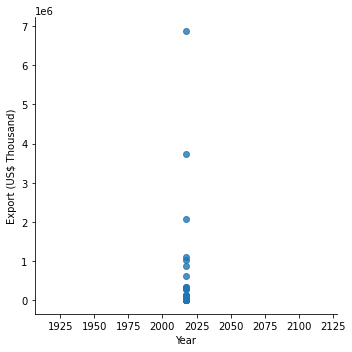

In [30]:
sns.lmplot(x='Year', y='Export (US$ Thousand)', data=df1)

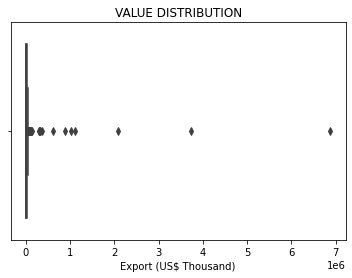

In [31]:
sns.boxplot(x=df1['Export (US$ Thousand)'])
plt.title("VALUE DISTRIBUTION")
plt.show()

In [32]:
df1.head()

,Export (US$ Thousand),AHS Simple Average (%),AHS Weighted Average (%),MFN Total Tariff Lines,MFN Specific Tariff Lines Share (%),MFN MaxRate (%),MFN SpecificDuty Imports (US$ Thousand),Year
0,59.73,0.00,0.00,4.0,0.00,0.00,0.00,2017.0
1,57904.95,14.21,14.32,242.0,16.53,76.78,3.55,2017.0
2,8914.84,10.35,0.57,366.0,12.02,61.72,53432.26,2017.0
3,253.85,0.00,0.00,2.0,0.00,57.60,0.00,2017.0
4,0.27,0.00,0.00,6.0,66.67,0.00,0.16,2017.0


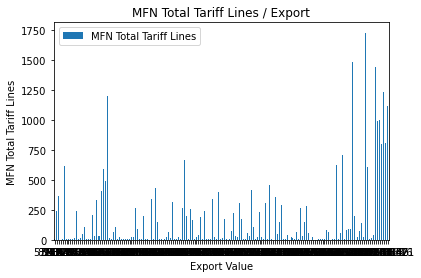

In [33]:
df1.plot(kind='bar', x='Export (US$ Thousand)', y='MFN Total Tariff Lines', rot=0)
plt.title("MFN Total Tariff Lines / Export")
plt.xlabel('Export Value')
plt.ylabel('MFN Total Tariff Lines')
plt.show()

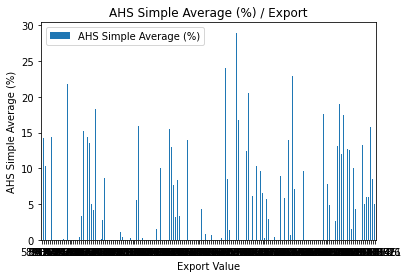

In [34]:
df1.plot(kind='bar', x='Export (US$ Thousand)', y='AHS Simple Average (%)', rot=0)
plt.title("AHS Simple Average (%) / Export")
plt.xlabel('Export Value')
plt.ylabel('AHS Simple Average (%)')
plt.show()

In [35]:
df1.head()

,Export (US$ Thousand),AHS Simple Average (%),AHS Weighted Average (%),MFN Total Tariff Lines,MFN Specific Tariff Lines Share (%),MFN MaxRate (%),MFN SpecificDuty Imports (US$ Thousand),Year
0,59.73,0.00,0.00,4.0,0.00,0.00,0.00,2017.0
1,57904.95,14.21,14.32,242.0,16.53,76.78,3.55,2017.0
2,8914.84,10.35,0.57,366.0,12.02,61.72,53432.26,2017.0
3,253.85,0.00,0.00,2.0,0.00,57.60,0.00,2017.0
4,0.27,0.00,0.00,6.0,66.67,0.00,0.16,2017.0


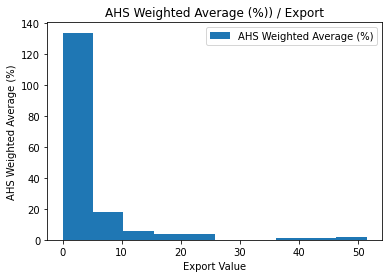

In [36]:
df1.plot(kind='hist', x='Export (US$ Thousand)', y='AHS Weighted Average (%)', rot=0)
plt.title("AHS Weighted Average (%)) / Export")
plt.xlabel('Export Value')
plt.ylabel('AHS Weighted Average (%)')
plt.show()

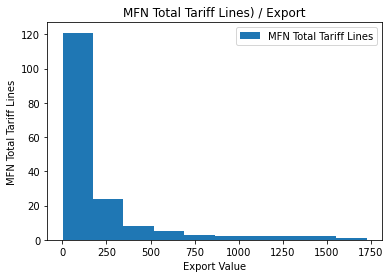

In [37]:
df1.plot(kind='hist', x='Export (US$ Thousand)', y='MFN Total Tariff Lines', rot=0)
plt.title("MFN Total Tariff Lines) / Export")
plt.xlabel('Export Value')
plt.ylabel('MFN Total Tariff Lines')
plt.show()

<AxesSubplot:>

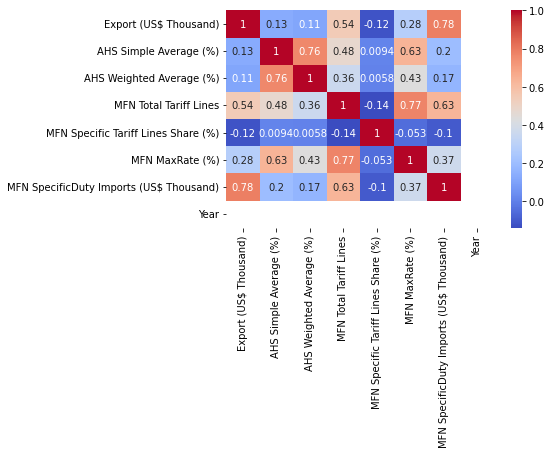

In [38]:
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

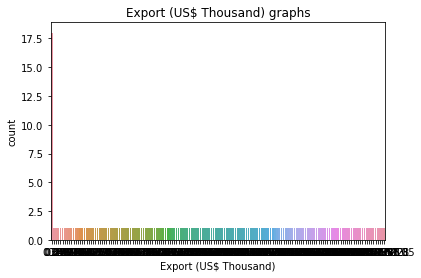

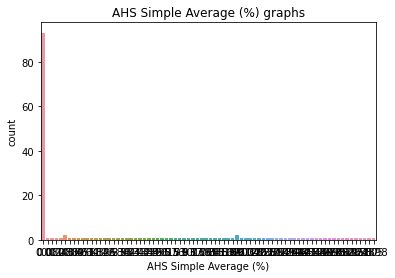

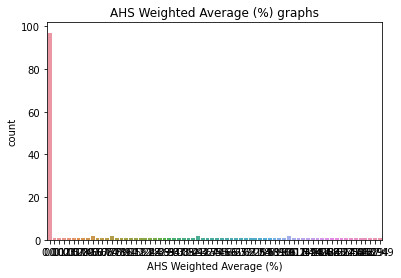

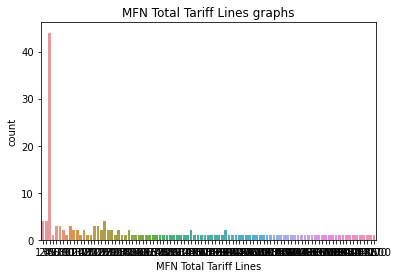

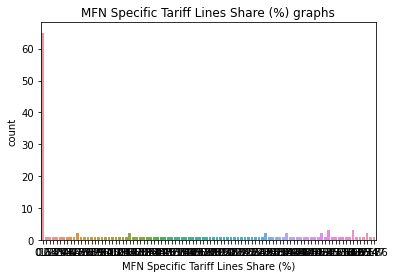

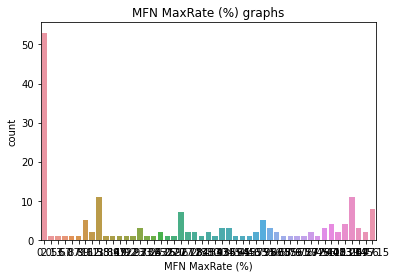

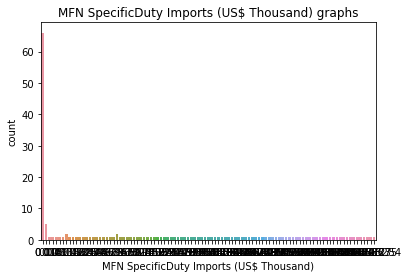

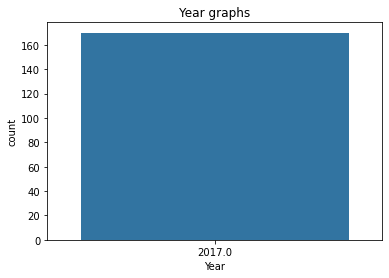

In [39]:
for col in df1.columns:
    sns.countplot(x=col, data=df1)
    plt.title("{} graphs".format(col))
    plt.show()

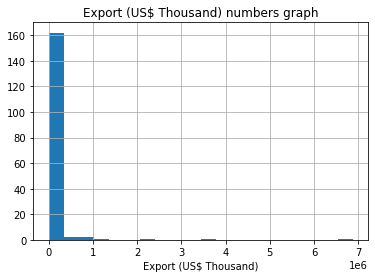

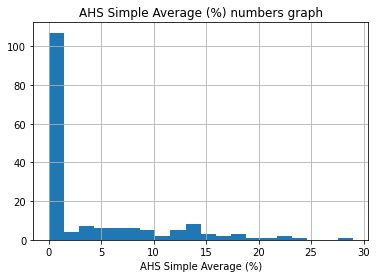

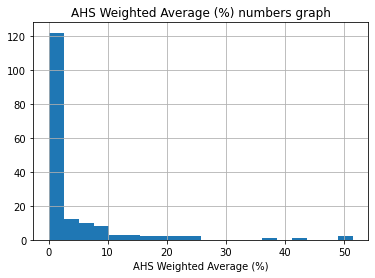

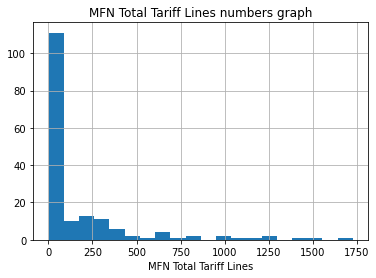

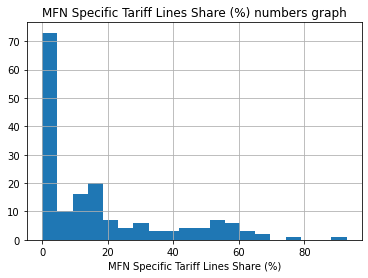

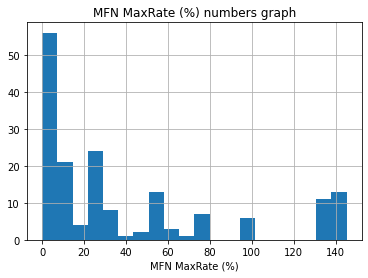

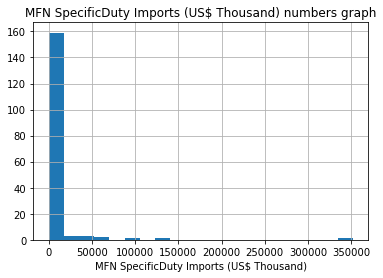

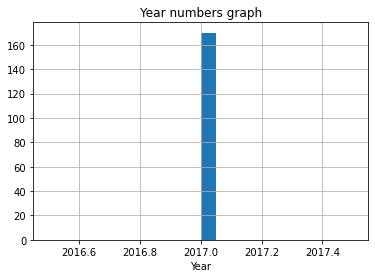

In [40]:
def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.title("{} numbers graph".format(col))
    plt.xlabel(numerical_col)
    plt.show(block=True)

for col in df1.columns:
    plot_numerical_col(df1, col)

In [41]:
df1.rename(columns={"Export (US$ Thousand)":"ExportValue"}, inplace=True)

In [42]:
df1.head()

,ExportValue,AHS Simple Average (%),AHS Weighted Average (%),MFN Total Tariff Lines,MFN Specific Tariff Lines Share (%),MFN MaxRate (%),MFN SpecificDuty Imports (US$ Thousand),Year
0,59.73,0.00,0.00,4.0,0.00,0.00,0.00,2017.0
1,57904.95,14.21,14.32,242.0,16.53,76.78,3.55,2017.0
2,8914.84,10.35,0.57,366.0,12.02,61.72,53432.26,2017.0
3,253.85,0.00,0.00,2.0,0.00,57.60,0.00,2017.0
4,0.27,0.00,0.00,6.0,66.67,0.00,0.16,2017.0


In [43]:
# selecting x, and y and applying standardization
X, y = df1.drop('ExportValue', axis=1), df1.ExportValue
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.63016446, -0.43924291, -0.5360082 , ..., -0.8391943 ,
        -0.19464944,  0.        ],
       [ 1.6364272 ,  1.27706306,  0.22068725, ...,  0.77774788,
        -0.19453239,  0.        ],
       [ 1.02073094, -0.37092627,  0.61493194, ...,  0.46059303,
         1.56711791,  0.        ],
       ...,
       [ 1.88844795,  1.27946014,  3.37464477, ...,  2.10428067,
         1.02329194,  0.        ],
       [ 0.73042856,  0.32662267,  2.02340289, ...,  2.21758034,
         0.70456764,  0.        ],
       [ 0.16896462, -0.32658037,  2.99311765, ...,  1.96360375,
         0.12462417,  0.        ]])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print("X_train {}".format(X_train.shape))
print("X_test {}".format(X_test.shape))
print("y_train {}".format(y_train.shape))
print("y_test {}".format(y_test.shape))


X_train (136, 7)
X_test (34, 7)
y_train (136,)
y_test (34,)


# Decision Tree Regressor


In [46]:
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
dtr_result = r2_score(y_test, y_pred_dtr)
accuracy_dec = dtr.score(X_test, y_test)
print(accuracy_dec)

0.2691693950841195


#  Decision Tree Regressor GridSearchCV 

In [47]:
max_depth = [2, 4, 6, 8]
min_samples_split = [2, 4, 6, 8]
min_samples_leaf = [1, 2, 3, 4]

# Create hyperparameter grid
param_grid = {'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}
grid_search = GridSearchCV(dtr, param_grid, cv=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

dtr_grid = DecisionTreeRegressor(random_state = 0, max_depth = 4, min_samples_leaf = 1, min_samples_split = 4)
dtr_grid.fit(X_train, y_train)
y_pred_dtr_grid = dtr_grid.predict(X_test)
dtr_result_grid = r2_score(y_test, y_pred_dtr)
accuracy_dec_grid = dtr_grid.score(X_test, y_test)
print(accuracy_dec_grid)

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.6055156218830269


# Random Forest Regression

In [48]:
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)
reg_result = r2_score(y_test, y_pred_reg)
accuracy_reg = reg.score(X_test, y_test)
print("Random forest regression accuracy is {}".format(accuracy_reg))

Random forest regression accuracy is 0.2951039985587516


# Random Forest GridSearchCV

In [49]:
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10]}
grid_search_reg = GridSearchCV(reg, param_grid, cv=5)
grid_search_reg.fit(X_train, y_train)
print(grid_search_reg.best_params_)
print("They are our best params")

{'max_depth': 10, 'n_estimators': 50}
They are our best params


In [50]:
reg_grid = RandomForestRegressor(n_estimators=50, random_state=42, max_depth = 10)
reg_grid.fit(X_train, y_train)
y_pred_reg_grid = reg_grid.predict(X_test)
reg_result_grid = r2_score(y_test, y_pred_reg)
accuracy_reg_grid = reg_grid.score(X_test, y_test)
print(accuracy_reg_grid)
print("Random forest regression gridsearchCV accuracy is {}".format(accuracy_reg_grid))

0.3410105934966202
Random forest regression gridsearchCV accuracy is 0.3410105934966202


In [51]:
scores1 = cross_val_score(dtr, X,y,cv=5)
scores2 = cross_val_score(reg, X,y,cv=5)
print(scores1.mean())
print(scores2.mean())

"""

Cross Validation (CV) is a method used to evaluate the performance of a machine learning model. The CV divides the dataset into a certain number of parts ("folds"), one of which is used as the training data of the model, while the others are used as the test data. This process is repeated for all folds in the data set and the average performance of the model over the entire data set is calculated.

However, sometimes the Cross Validation result may return a negative value. This may mean that the model underperforms on the real dataset. This may be because the model has too much variance (variability between features) in the data set or too little data in the data set.

A negative CV result does not mean that the model's performance is actually lower. This is because although CV has a certain variance in the dataset, it may have lower variance in the real dataset. Therefore, a negative CV result may not necessarily indicate that the model can actually perform better.

To understand why the CV result is negative, the performance of the model on the training and test data and its variance in the data set should also be considered. This information can help to better understand how the model actually performs.
"""

-1.9945124212864642
-1.431849898320607


'\n\nCross Validation (CV) is a method used to evaluate the performance of a machine learning model. The CV divides the dataset into a certain number of parts ("folds"), one of which is used as the training data of the model, while the others are used as the test data. This process is repeated for all folds in the data set and the average performance of the model over the entire data set is calculated.\n\nHowever, sometimes the Cross Validation result may return a negative value. This may mean that the model underperforms on the real dataset. This may be because the model has too much variance (variability between features) in the data set or too little data in the data set.\n\nA negative CV result does not mean that the model\'s performance is actually lower. This is because although CV has a certain variance in the dataset, it may have lower variance in the real dataset. Therefore, a negative CV result may not necessarily indicate that the model can actually perform better.\n\nTo und

In [52]:
result = pd.DataFrame({"Models":["Decision Tree Regressor","Random Forest Regressor"],
                     'Accuracy':[accuracy_dec, accuracy_reg],
                     'GridSearchCV':[accuracy_dec_grid, accuracy_reg_grid]})
result.head()

,Models,Accuracy,GridSearchCV
0,Decision Tree Regressor,0.269169,0.605516
1,Random Forest Regressor,0.295104,0.341011


In [53]:
# The best accuracy result is, Decision tree Regressor
print("Best accuracy result is decision tree: {}".format(accuracy_dec_grid))

Best accuracy result is decision tree: 0.6055156218830269
